In [1]:
import os,sys
import numpy as np
from HMM.Model_to_CRN import translate_model as translate
from CRN_Engines.DMAK_CPU import DMAK_CPU as DMAK
from HMM.BaumWelch import BaumWelch as BW
from HMM.BaumWelch_inbuilt import BaumWelch_inbuilt as BW_I

# Example-1a

In [2]:
model_file = "../Models/Example-1a.txt"

### Baum-Welch

In [3]:
BW(model_file)

Observation_sequence:
 [1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0
 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0] 

Start_probability:
 [0.5 0.5] 

Transition_Probability:
 [[0.5 0.5]
 [0.5 0.5]] 

Emission_Probability:
 [[0.5 0.5]
 [0.5 0.5]] 


After Training:
Alpha:
 [[2.40000000e-01 2.40000000e-01]
 [1.24800000e-01 1.24800000e-01]
 [5.99040000e-02 5.99040000e-02]
 [2.87539200e-02 2.87539200e-02]
 [1.49520384e-02 1.49520384e-02]
 [7.17697843e-03 7.17697843e-03]
 [3.44494965e-03 3.44494965e-03]
 [1.79137382e-03 1.79137382e-03]
 [8.59859432e-04 8.59859432e-04]
 [4.47126905e-04 4.47126905e-04]
 [2.32505990e-04 2.32505990e-04]
 [1.20903115e-04 1.20903115e-04]
 [5.80334952e-05 5.80334952e-05]
 [3.01774175e-05 3.01774175e-05]
 [1.56922571e-05 1.56922571e-05]
 [8.15997369e-06 8.15997369e-06]
 [3.91678737e-06 3.91678737e-06]
 [2.03672943e-06 2.03672943e-06]
 [1.05909931e-06 1.059

In [4]:
BW_I(model_file)

Viterbi:
 (-138.6294361119893, array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])) 

Monitor:
 ConvergenceMonitor(
    history=[-69.31471805599459, -69.23469670899607, -69.23469670899607],
    iter=3,
    n_iter=1000,
    tol=1e-09,
    verbose=False,
) 

Start probability:
 [0.5 0.5] 

Transition probability:
 [[0.5 0.5]
 [0.5 0.5]] 

Emission probability:
 [[0.52 0.48]
 [0.52 0.48]] 



### Chemical-Baum-Welch

In [5]:
# generating reaction network
reaction_system = translate(model_file,False,False)
species = np.array(reaction_system[0])
reactants = np.array(reaction_system[1][0])
products = np.array(reaction_system[1][1])
rates = np.array(reaction_system[1][2])
initial = np.array(reaction_system[2])

In [6]:
# simulation parameters
duration = 5
num_step = 1000

# simulating
output = DMAK(reactants,products,rates,initial,duration,num_step,True,False,species)

# saving simulation results
output_file = model_file.split('.')[2][1:]+'_output.npy'
with open(output_file, 'wb') as f:
    np.save(output_file,output)

In [7]:
# load from saved simulation results
output_file = model_file.split('.')[2][1:]+'_output.npy'
output = np.load(output_file)

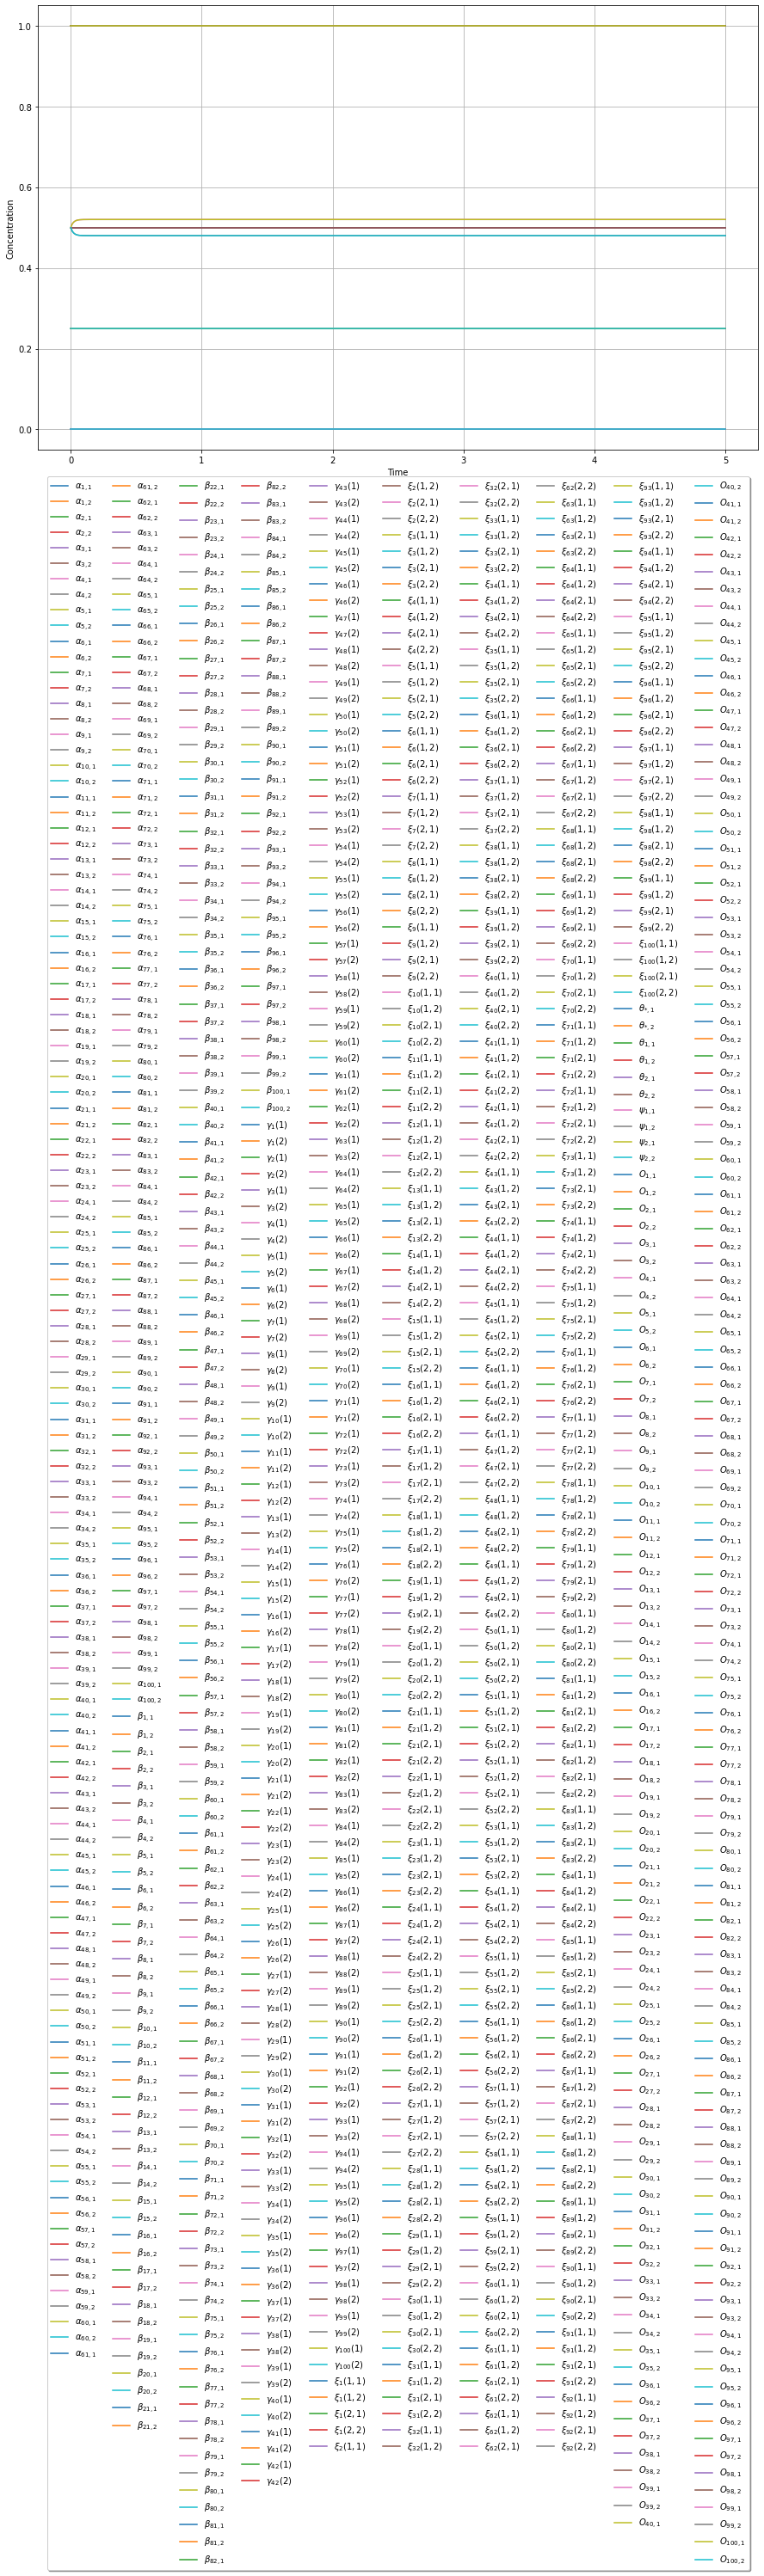

In [8]:
# set plot parameters
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# plotting
t_index = np.linspace(0, duration, num_step)
fig, ax = plt.subplots()
for i in range(output.shape[1]):
    label = species[i]
    ax.plot(t_index, output[:, i], label = '$'+label+'$')
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.95])
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=10)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.grid()
plt.show()

# Example-1b

In [9]:
model_file = "../Models/Example-1b.txt"

### Baum-Welch

In [10]:
BW(model_file)

Observation_sequence:
 [1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0
 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0] 

Start_probability:
 [0.5 0.5] 

Transition_Probability:
 [[0.774 0.226]
 [0.427 0.573]] 

Emission_Probability:
 [[0.916 0.084]
 [0.51  0.49 ]] 


After Training:
Alpha:
 [[2.18775173e-01 2.65557387e-01]
 [1.48700168e-01 1.03132732e-01]
 [6.03737175e-02 6.04683253e-02]
 [2.88995641e-02 2.91016358e-02]
 [1.78299459e-02 1.23320007e-02]
 [7.23107103e-03 7.24211432e-03]
 [3.46128590e-03 3.48548588e-03]
 [2.13548282e-03 1.47699693e-03]
 [8.66061397e-04 8.67384046e-04]
 [5.32891937e-04 3.68542474e-04]
 [2.77800641e-04 1.91081231e-04]
 [1.44503346e-04 9.93868064e-05]
 [5.84727238e-05 5.85573111e-05]
 [3.59771322e-05 2.48813774e-05]
 [1.87551450e-05 1.29004603e-05]
 [9.75584933e-06 6.70989797e-06]
 [3.94766695e-06 3.95337768e-06]
 [2.42892286e-06 1.67981556e-06]
 [1.26

In [11]:
BW_I(model_file)

Viterbi:
 (-109.53198871849449, array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0])) 

Monitor:
 ConvergenceMonitor(
    history=[-82.41789393806027, -69.97979322625271, -69.8080746220993, -69.6977647049949, -69.6210684439201, -69.5646872636403, -69.52148824506642, -69.48731950937487, -69.45960656300473, -69.43667047970386, -69.41737040032572, -69.40090412977777, -69.38669108699133, -69.37430058108653, -69.36340622187538, -69.35375601095191, -69.34515217120502, -69.33743720962275, -69.33048407749605, -69.32418908853377, -69.31846673305107, -69.31324582082019, -69.30846657120193, -69.30407838933594, -69.30003814638908, -69.2963088350524, -69.29285850779507, -69.2896594305862, -69.28668740251564, -69.28392120

### Chemical-Baum-Welch

In [12]:
# generating reaction network
reaction_system = translate(model_file,False,False)
species = np.array(reaction_system[0])
reactants = np.array(reaction_system[1][0])
products = np.array(reaction_system[1][1])
rates = np.array(reaction_system[1][2])
initial = np.array(reaction_system[2])

In [13]:
# simulation parameters
duration = 5
num_step = 1000

# simulating
output = DMAK(reactants,products,rates,initial,duration,num_step,True,False,species)

# saving simulation results
output_file = model_file.split('.')[2][1:]+'_output.npy'
with open(output_file, 'wb') as f:
    np.save(output_file,output)

In [14]:
# load from saved simulation results
output_file = model_file.split('.')[2][1:]+'_output.npy'
output = np.load(output_file)

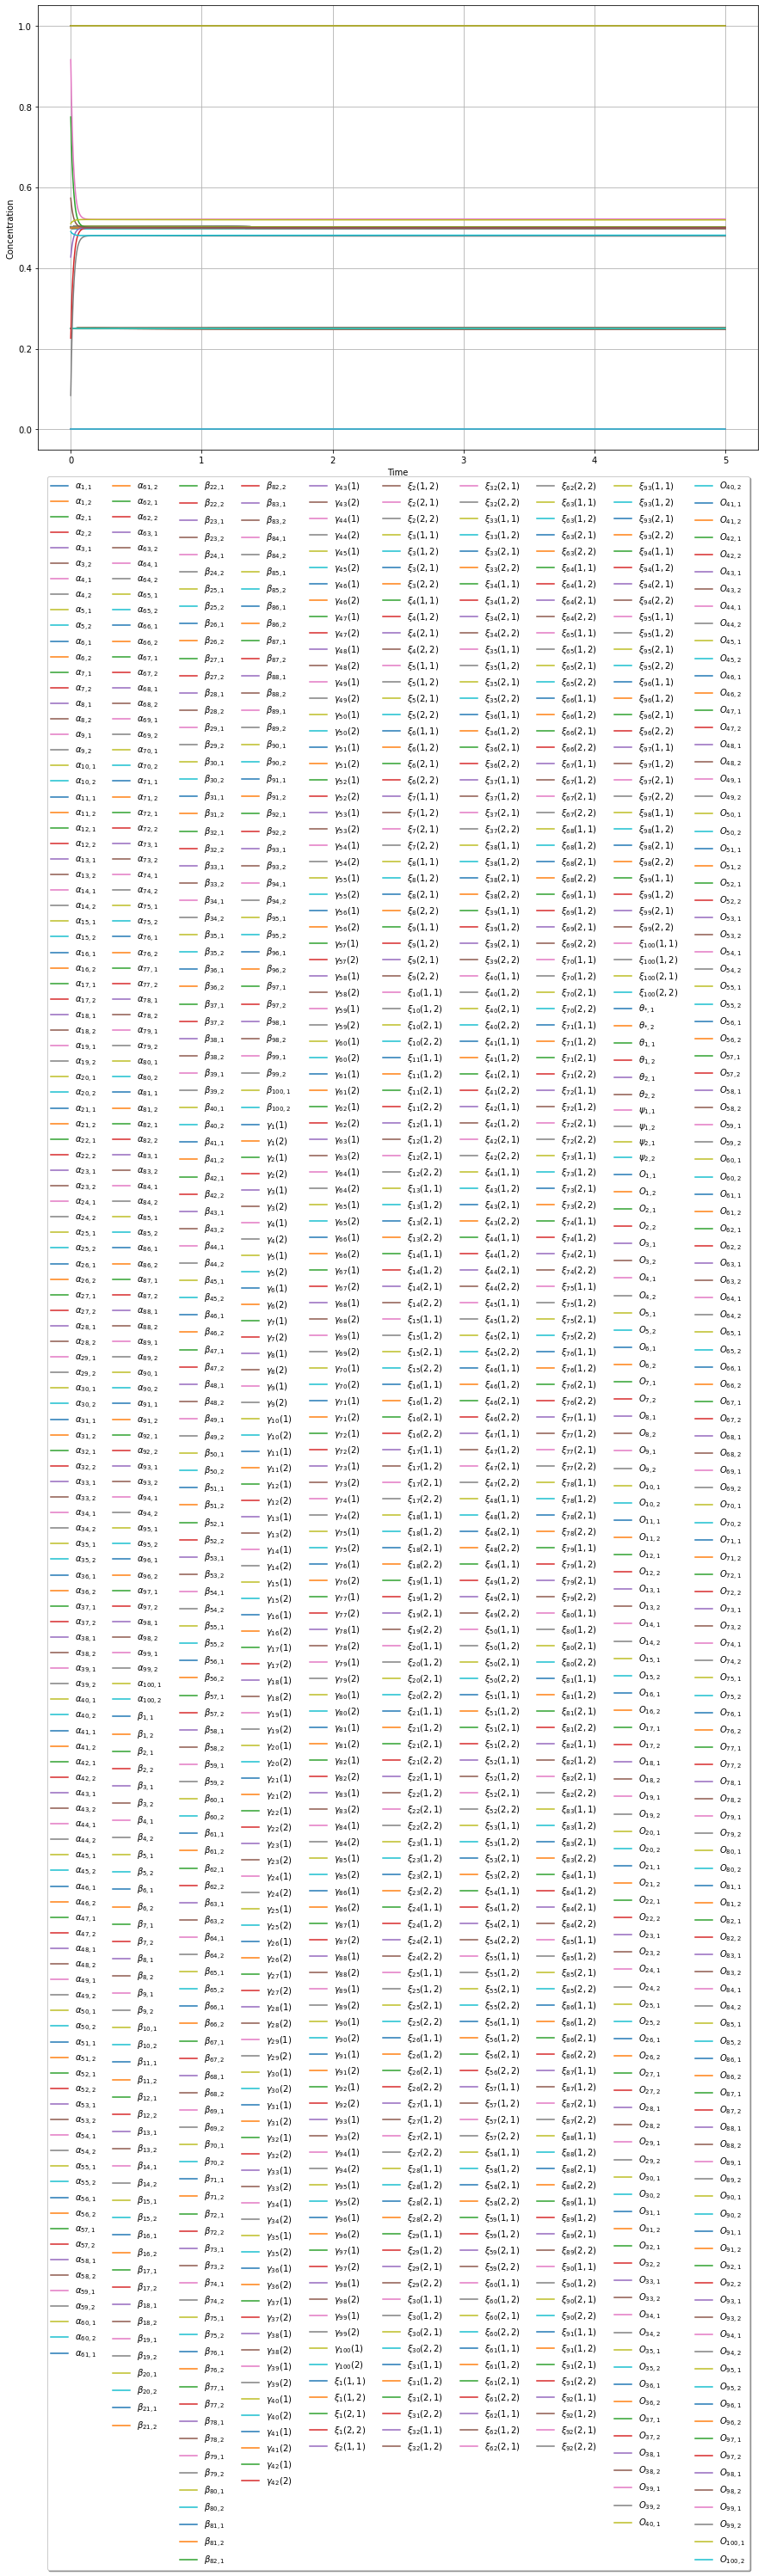

In [15]:
# set plot parameters
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# plotting
t_index = np.linspace(0, duration, num_step)
fig, ax = plt.subplots()
for i in range(output.shape[1]):
    label = species[i]
    ax.plot(t_index, output[:, i], label = '$'+label+'$')
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.95])
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=10)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.grid()
plt.show()

# Example-2

In [16]:
model_file = "../Models/Example-2.txt"

### Baum-Welch

In [17]:
BW(model_file)

Observation_sequence:
 [1 0 1 0 1] 

Start_probability:
 [0.6 0.4] 

Transition_Probability:
 [[0.7 0.3]
 [0.4 0.6]] 

Emission_Probability:
 [[0.6 0.4]
 [0.6 0.4]] 


After Training:
Alpha:
 [[0.6 0. ]
 [0.  0.6]
 [0.6 0. ]
 [0.  0.6]
 [0.6 0. ]] 

Beta:
 [[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 1.]] 

Gamma:
 [[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]] 

Xi:
 [[[0. 1.]
  [0. 0.]]

 [[0. 0.]
  [1. 0.]]

 [[0. 1.]
  [0. 0.]]

 [[0. 0.]
  [1. 0.]]] 

Transition_Probability:
 [[0. 1.]
 [1. 0.]] 

Emission_Probability:
 [[0. 1.]
 [1. 0.]] 



In [18]:
BW_I(model_file)

Viterbi:
 (-5.708048842675367, array([0, 0, 0, 0, 0])) 

Monitor:
 ConvergenceMonitor(
    history=[-3.7705234431544463, -3.3649261655669416, -3.364872088275898, -3.364840449592649, -3.364814082365492, -3.36478756905824, -3.3647590632328255, -3.364727786572473, -3.3646932609033833, -3.364655069889901, -3.364612781862429, -3.364565921042993, -3.364513952557685, -3.364456270439131, -3.36439218503229, -3.3643209083376133, -3.364241536366398, -3.364153027606329, -3.364054176511628, -3.3639435806178044, -3.3638195994316527, -3.363680302620831, -3.3635234041524003, -3.3633461777941607, -3.363145347626406, -3.362916944652138, -3.362656116828668, -3.362356874215843, -3.3620117423764455, -3.3616112838963486, -3.361143426896787, -3.360592505427726, -3.359937860240031, -3.359151752253359, -3.35819617191688, -3.3570178200161855, -3.3555399541471482, -3.3536486484740307, -3.351168640379324, -3.3478187430465356, -3.3431246960361816, -3.336236997203344, -3.3255188202799157, -3.307524165220352, -3.274

### Chemical-Baum-Welch

In [19]:
# generating reaction network
reaction_system = translate(model_file,False,False)
species = np.array(reaction_system[0])
reactants = np.array(reaction_system[1][0])
products = np.array(reaction_system[1][1])
rates = np.array(reaction_system[1][2])
initial = np.array(reaction_system[2])

In [20]:
# simulation parameters
duration = 200
num_step = 1000

# simulating
output = DMAK(reactants,products,rates,initial,duration,num_step,True,False,species)

# saving simulation results
output_file = model_file.split('.')[2][1:]+'_output.npy'
with open(output_file, 'wb') as f:
    np.save(output_file,output)

In [21]:
# load from saved simulation results
output_file = model_file.split('.')[2][1:]+'_output.npy'
output = np.load(output_file)

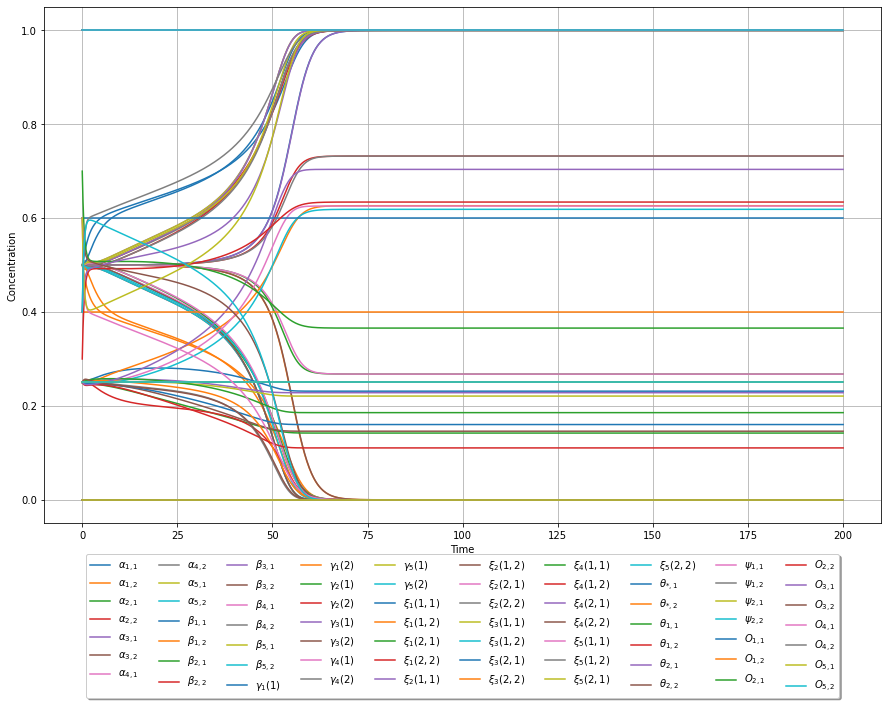

In [22]:
# set plot parameters
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# plotting
t_index = np.linspace(0, duration, num_step)
fig, ax = plt.subplots()
for i in range(output.shape[1]):
    label = species[i]
    ax.plot(t_index, output[:, i], label = '$'+label+'$')
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.95])
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=10)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.grid()
plt.show()